In [275]:
import pandas as pd

#dataset = https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

In [276]:
#import DF
df = pd.read_csv('amazon.csv', engine='python')

#removing no fire reports
df = df.loc[df['number'] != 0]

#sort by worst months
df.sort_values('number',ascending=False)

#Correcting "Rio"
df[['state']] = df[['state']].replace('Rio', 'Rio de Janeiro')

df

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,2003-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
12,2010,Acre,Janeiro,1.0,2010-01-01
17,2015,Acre,Janeiro,1.0,2015-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


<AxesSubplot:ylabel='State'>

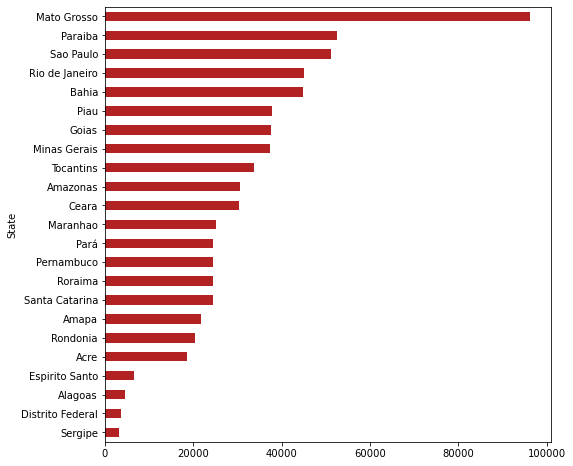

In [277]:
#Fire report by state
df.groupby("state")["number"].sum().sort_values(ascending=True).plot.barh(xlabel='State',ylabel='Fire Cases',figsize=(8, 8),
                                                                          color = 'firebrick')

In [278]:
df['year'].max()

2017

In [279]:
df['year'].min()

1998

<AxesSubplot:ylabel='State'>

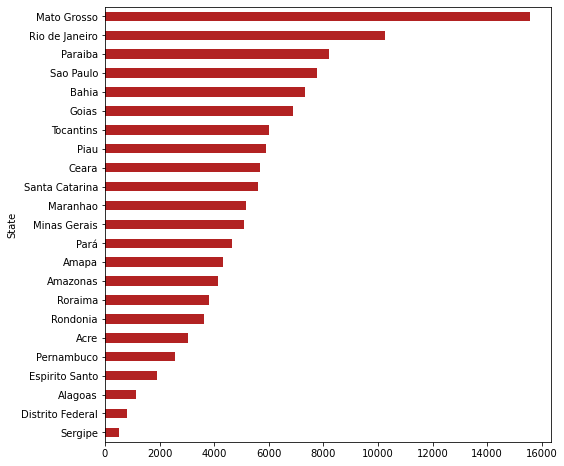

In [280]:
#Fire report by state 2015 to 2017
df_states = df.loc[df['year']>=2015]
df_states.groupby("state")["number"].sum().sort_values(ascending=True).plot.barh(xlabel='State',ylabel='Fire Cases',
                                                                                 figsize=(8, 8), color = 'firebrick')

<AxesSubplot:xlabel='Year', ylabel='Fire Cases'>

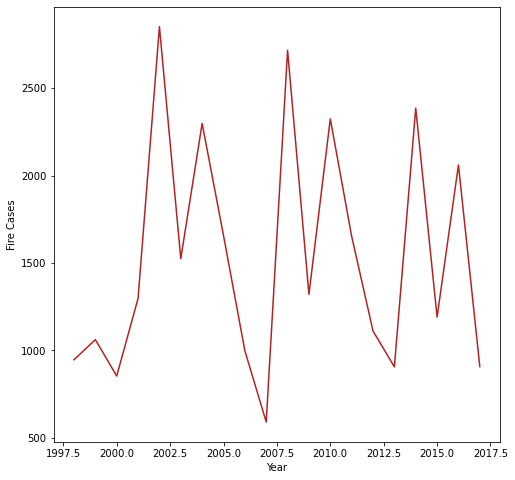

In [281]:
#Fire report evolution in Amazon

df_amaz = df.loc[df['state']== 'Amazonas']
df_amaz.groupby("year")["number"].sum().plot.line(xlabel='Year',ylabel='Fire Cases', figsize=(8, 8),
                                                                                 color = 'firebrick')

<AxesSubplot:xlabel='Year', ylabel='Fire Cases'>

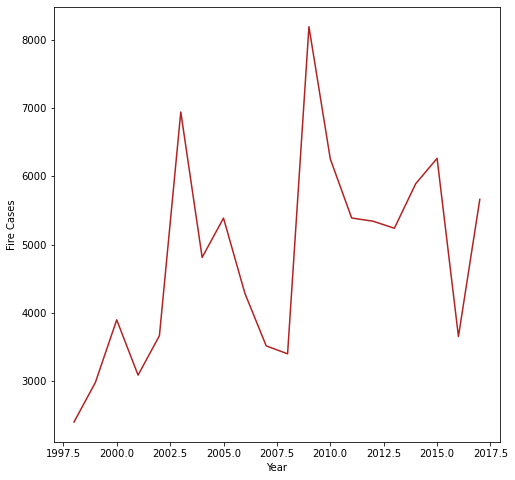

In [282]:
#Fire report evolution in Mato Grosso
df_mg = df.loc[df['state']== 'Mato Grosso']
df_mg.groupby("year")["number"].sum().plot.line(xlabel='Year',ylabel='Fire Cases', figsize=(8, 8),
                                                                                 color = 'firebrick')

<AxesSubplot:>

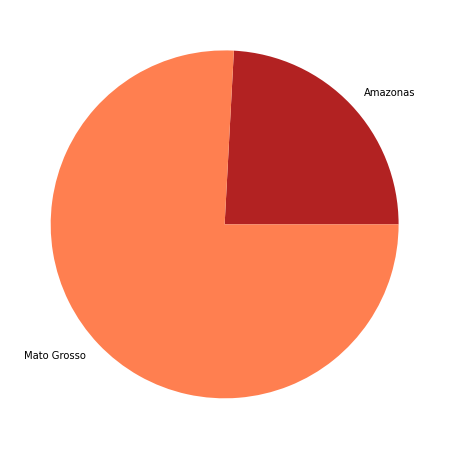

In [283]:
#Amazonas vs Mato Grosso total reports

df_am = df_amaz.append(df_mg)
df_am.groupby("state")["number"].sum().plot.pie(figsize=(8, 8), label='',colors=['firebrick','coral'])

<AxesSubplot:ylabel='Year'>

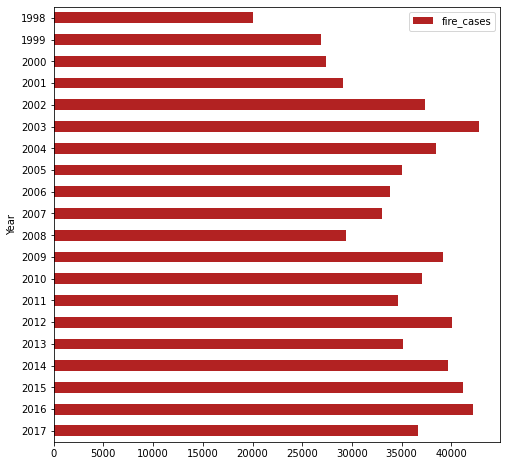

In [284]:
#Fire report by years
df_years = df.groupby("year").sum()
df_years.columns = ['fire_cases']
df_years = df_years.sort_index(ascending=False)
df_years.plot.barh(xlabel='Year',ylabel='Fire Cases',figsize=(8, 8), color = 'firebrick')

In [285]:
#Fire report by months
df_months = df.groupby("month").sum()
df_months.columns = ['x', 'fire_cases']
df_months = df_months['fire_cases'].sort_values(ascending=False)
df_months

month
Julho        92326.113
Outubro      88681.579
Agosto       88050.435
Novembro     85508.054
Setembro     58578.305
Dezembro     57535.480
Junho        56010.675
Janeiro      47747.844
Maio         34731.363
Fevereiro    30848.050
Março        30717.405
Abril        28188.770
Name: fire_cases, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Fire Cases'>

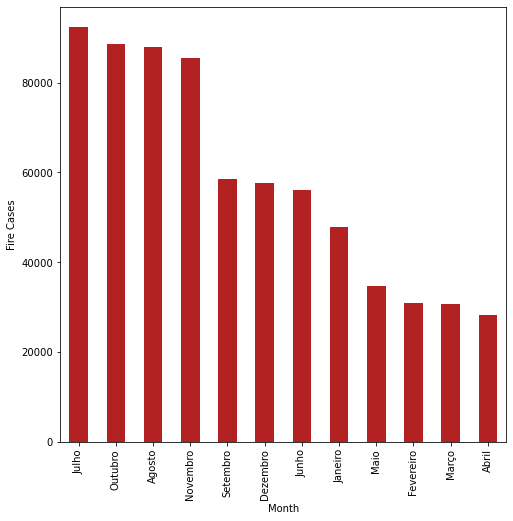

In [286]:
#Reports graph by month
df_months.plot.bar(xlabel='Month',ylabel='Fire Cases',figsize=(8, 8),color = 'firebrick')

# Conclusion:

- Despite the popular prominence over the Amazon, Mato Grosso had the highest number of fires 🔥 <br/>
  (Maybe a dataset with burned area can help make this clear) <br/>

- July is the month with the most fires 🔥

- 2003 was the month with the highest number of fires 🔥
